1: Imports and loading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Display settings
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Add the project root folder to the path
sys.path.append(os.path.abspath(".."))

# Load the dataset (path relative to the project)
from src.load_data import load_diabetes_data
df = load_diabetes_data("C:\Proyectos_DATA_&_IA\diabetes-risk-prediction_project\data\diabetes.csv")


✅ Data loaded successfully. Shape: (768, 9)


2: Dataset overview

In [3]:
# First rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# General information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Descriptive statistics
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


3: Check for missing or unusual values

In [6]:
# Null values in the dataset
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Check how many 0 values ​​there are in columns that shouldn't have them
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[cols_to_check] == 0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Convert zeros to NaN in the data frame

In [8]:
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)


In [9]:
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

4: Distribution of numerical variables

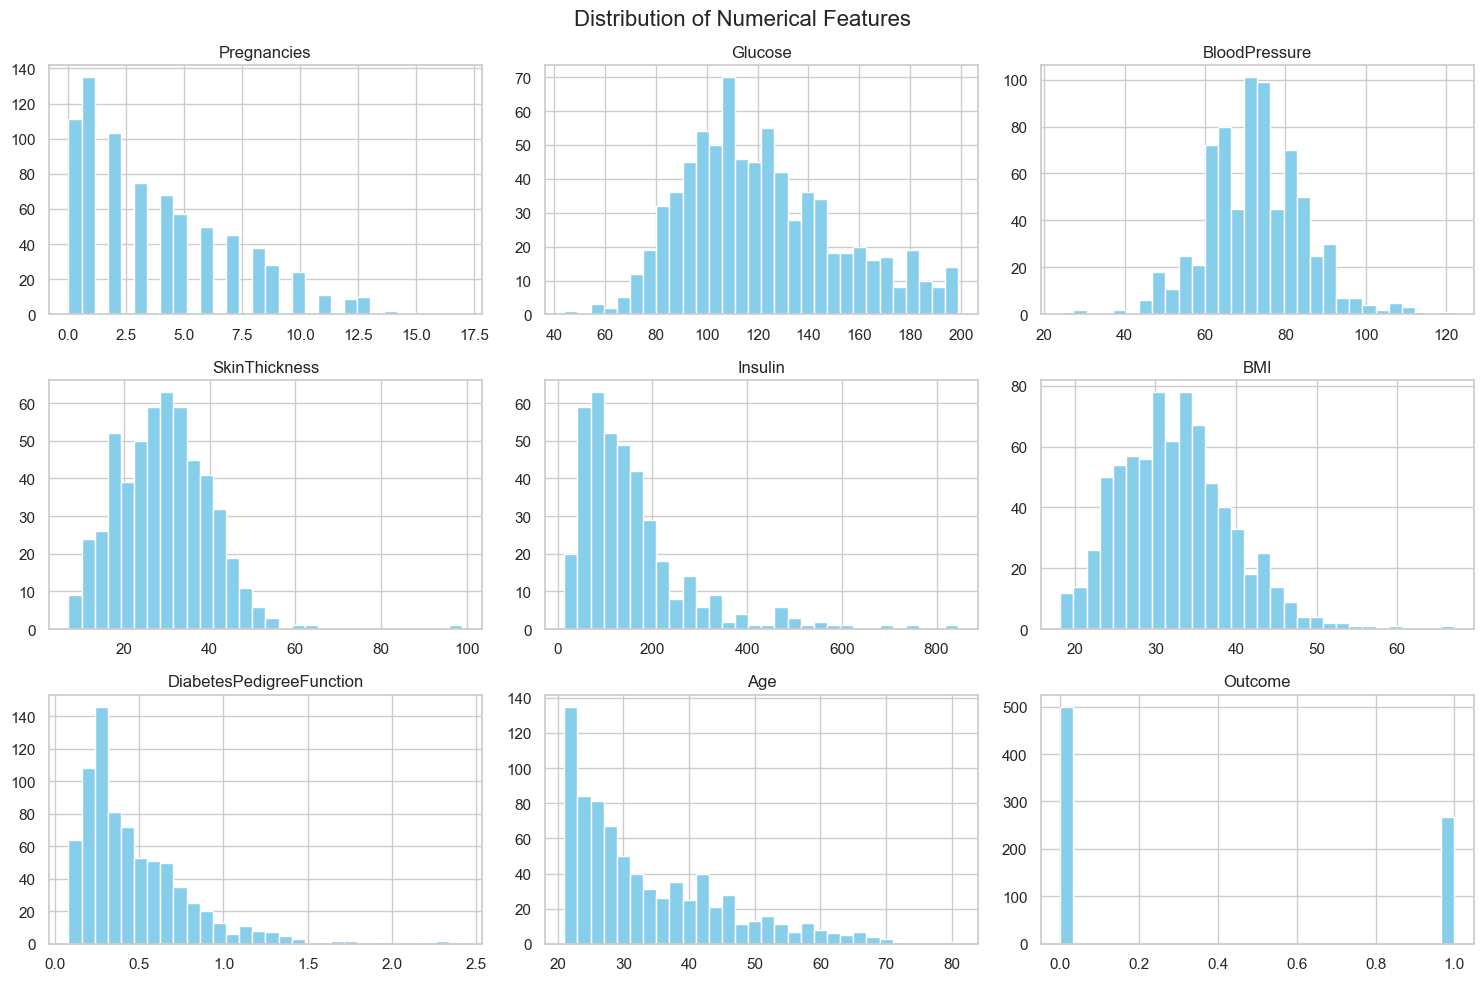

In [10]:
df.hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


5: Comparison between Outcome 0 vs 1

Text(0.5, 1.0, 'Glucose levels by Diabetes Outcome')

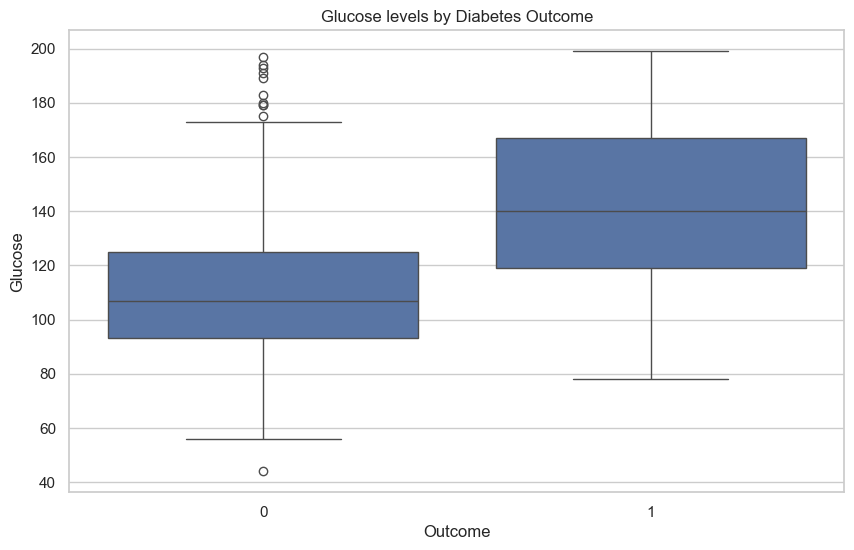

In [11]:
# Compare the variable 'Glucose' between patients with and without diabetes
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose levels by Diabetes Outcome")


6: Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

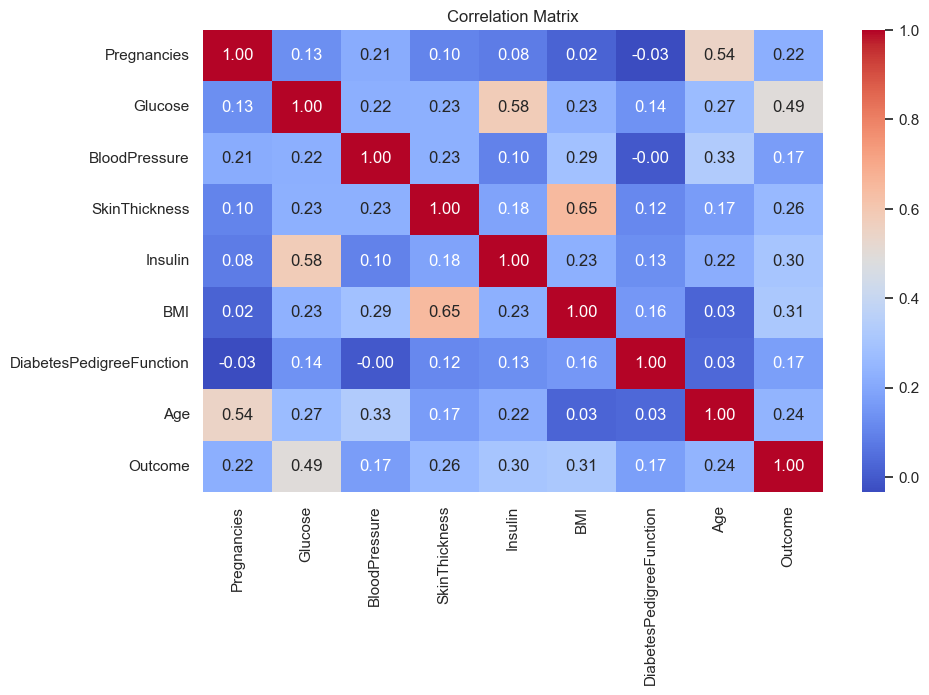

In [12]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")


7: Analysis of the objective variable (Outcome)

Text(0.5, 1.0, 'Distribution of Diabetes Outcome')

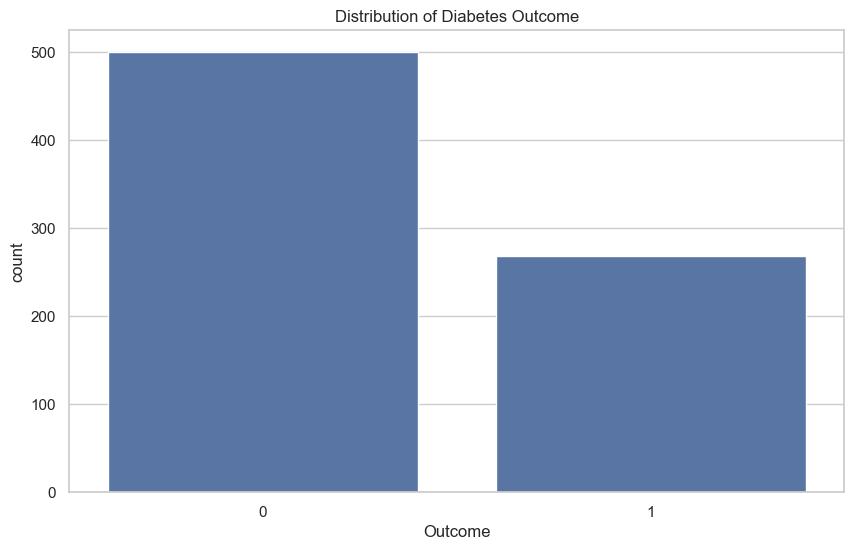

In [13]:
sns.countplot(x="Outcome", data=df)
plt.title("Distribution of Diabetes Outcome")


C:\Users\harod\AppData\Local\Temp\ipykernel_25492\2525080598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='Glucose', data=df, inner='quartile', palette='pastel')


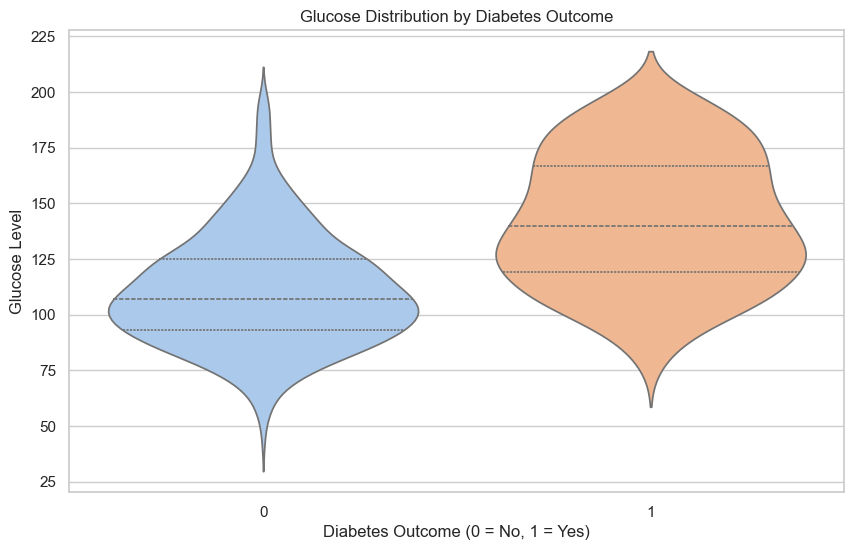

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violinplot: Glucose distribution by Outcome class
sns.violinplot(x='Outcome', y='Glucose', data=df, inner='quartile', palette='pastel')

plt.title("Glucose Distribution by Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Glucose Level")
plt.show()


Scatter plots with color by Outcome

<Axes: xlabel='Glucose', ylabel='Age'>

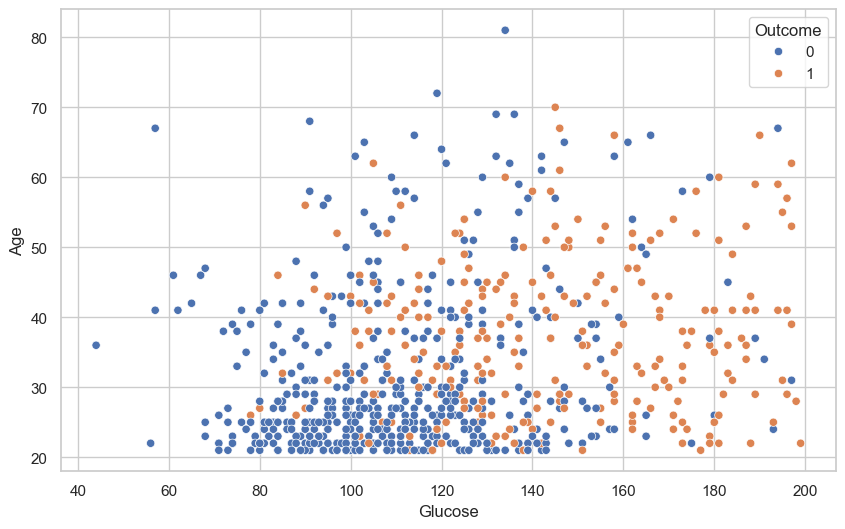

In [15]:
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=df)


Boxplot: glucose vs pregnancies


C:\Users\harod\AppData\Local\Temp\ipykernel_25492\237736008.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pregnancies", y="Glucose", data=df, palette="pastel")


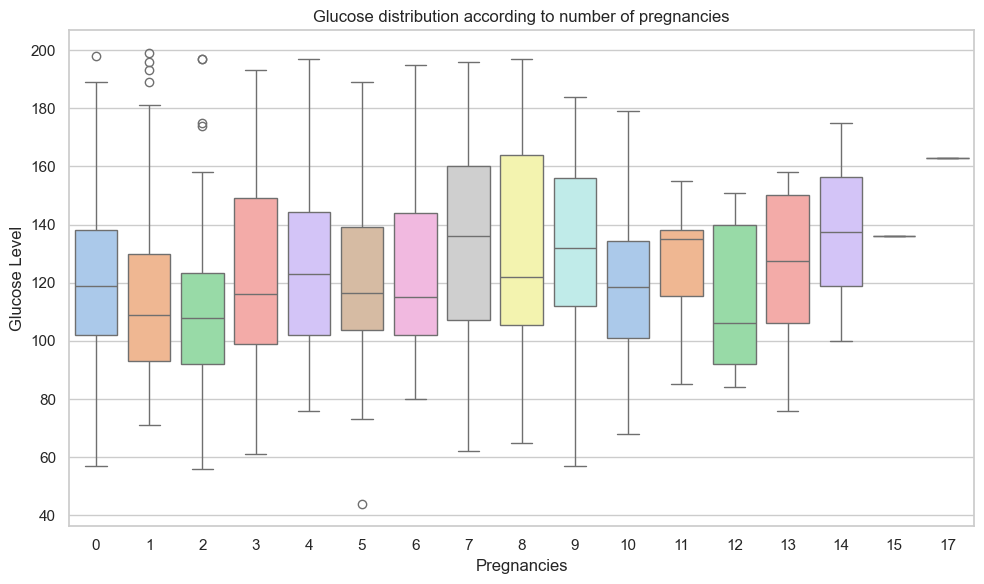

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="Pregnancies", y="Glucose", data=df, palette="pastel")
plt.title("Glucose distribution according to number of pregnancies")
plt.xlabel("Pregnancies")
plt.ylabel("Glucose Level")
plt.tight_layout()
plt.show()


Pearson correlation between Pregnancies and Glucose

In [19]:
correlation = df["Pregnancies"].corr(df["Glucose"])
print(f"Correlation (Pearson) between pregnancies and glucose level: {correlation:.3f}")


Correlation (Pearson) between pregnancies and glucose level: 0.128


 Pearson correlation between Glucose and BMI

In [20]:
correlation = df["Glucose"].corr(df["BMI"])
print(f"Correlación (Pearson) entre Glucose y BMI: {correlation:.3f}")


Correlación (Pearson) entre Glucose y BMI: 0.233


Visualization with scatterplot

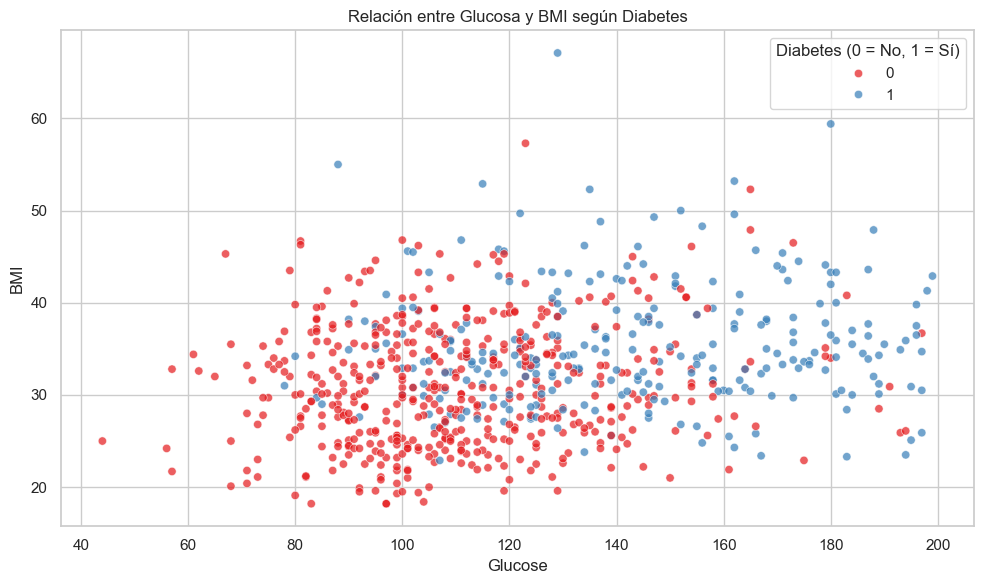

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Outcome", palette="Set1", alpha=0.7)
plt.title("Relación entre Glucosa y BMI según Diabetes")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend(title="Diabetes (0 = No, 1 = Sí)")
plt.tight_layout()
plt.show()


Scatterplot for Outcome

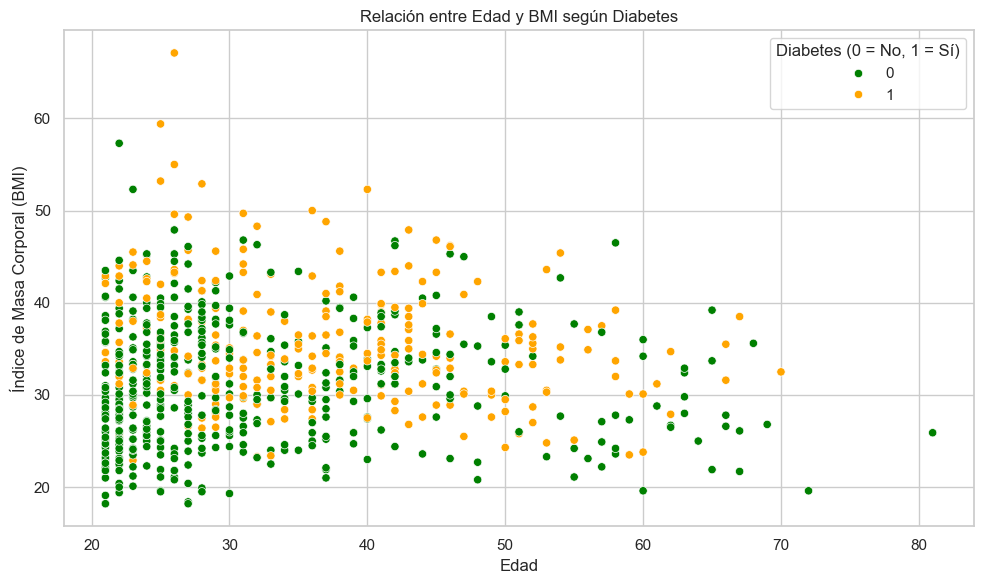

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear scatterplot de Age vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="BMI", hue="Outcome", palette={0: "green", 1: "orange"})

plt.title("Relación entre Edad y BMI según Diabetes")
plt.xlabel("Edad")
plt.ylabel("Índice de Masa Corporal (BMI)")
plt.legend(title="Diabetes (0 = No, 1 = Sí)")
plt.grid(True)
plt.tight_layout()
plt.show()


Pearson correlation between Age and BMI

In [24]:
correlation = df["Age"].corr(df["BMI"])
print(f"Correlación (Pearson) entre Age y BMI: {correlation:.3f}")


Correlación (Pearson) entre Age y BMI: 0.026
